In [9]:
import numpy as np
import json
import cv2
import pandas as pd
from scipy import ndimage
import matplotlib.pylab as plt
from numpy import array, zeros, argmin, inf, equal, ndim
from scipy.spatial.distance import cdist

joints_list = ["right_shoulder", "right_elbow", "right_wrist", "left_shoulder","left_elbow", "left_wrist",
        "right_hip", "right_knee", "right_ankle", "left_hip", "left_knee", "left_ankle", "neck ",
        "right_eye", "right_ear","left_eye", "left_ear"]

import os

## Load data (first step labels and joint trajectories)

For the first step, only videos in which the batter starts to run are interesting. I therefore created a seperate folder in which I put the json files with the pose estimation output for videos in which the batter starts to run. Of course it is possible to specify another path but note that the outputs might be nonsense if the batter doesn't move.

In [10]:
path = "/Volumes/Nina Backup/low_quality_testing/batter_runs/"

In [14]:
def from_json(file):
    coordinates = ["x", "y"]
    joints_list = ["right_shoulder", "right_elbow", "right_wrist", "left_shoulder","left_elbow", "left_wrist",
            "right_hip", "right_knee", "right_ankle", "left_hip", "left_knee", "left_ankle",
            "right_eye", "right_ear","left_eye", "left_ear", "nose ", "neck"]
    with open(file, 'r') as inf:
        out = json.load(inf)

    liste = []
    for fr in out["frames"]:
        l_joints = []
        for j in joints_list[:12]:
            l_coo = []
            for xy in coordinates:
                l_coo.append(fr[j][xy])
            l_joints.append(l_coo)
        liste.append(l_joints)

    return np.array(liste)


files = []
videos_b = []
joints_array_batter = []
path_list = os.listdir(path)
print(len(path_list))

files = []
for f in path_list[:20]:
    if f[-5:]!=".json" or "video" in f:
        continue
    name = f[:-5]
    files.append(name)
    with open(path+name+"_video.json", "r") as infile:
        videos_b.append(json.load(infile))
    joints_array_batter.append(from_json(path+ f))
# print(videos_b, joints_array_batter)

310


## Example X and Y trajectories of the batter

File: afa2b538-f2c4-4c29-8a66-bf6f4aeb8190


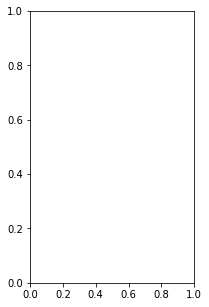

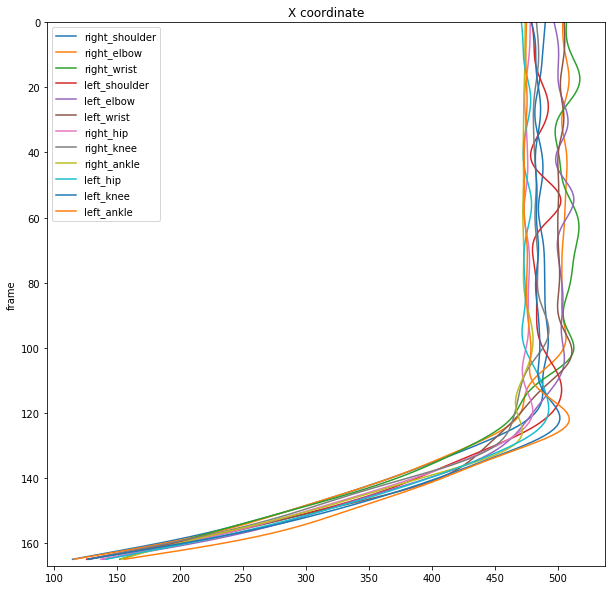

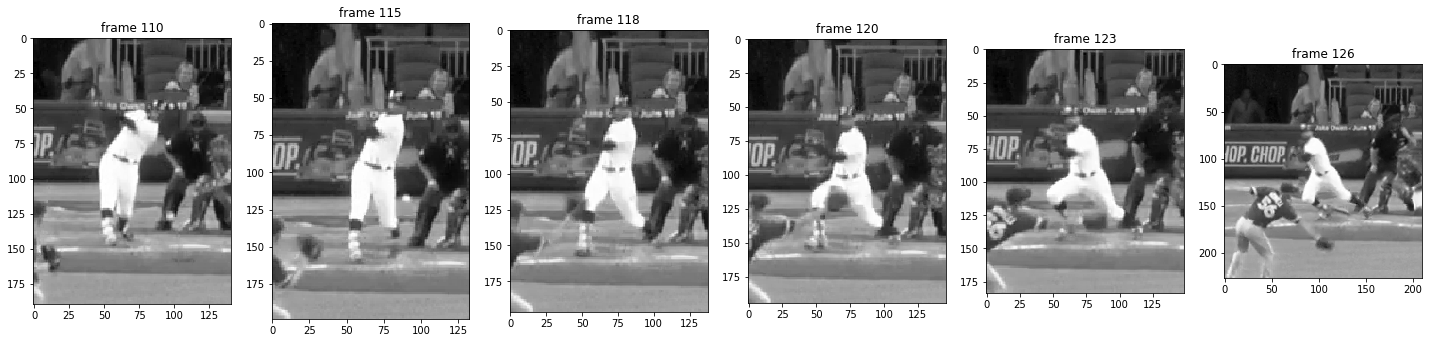

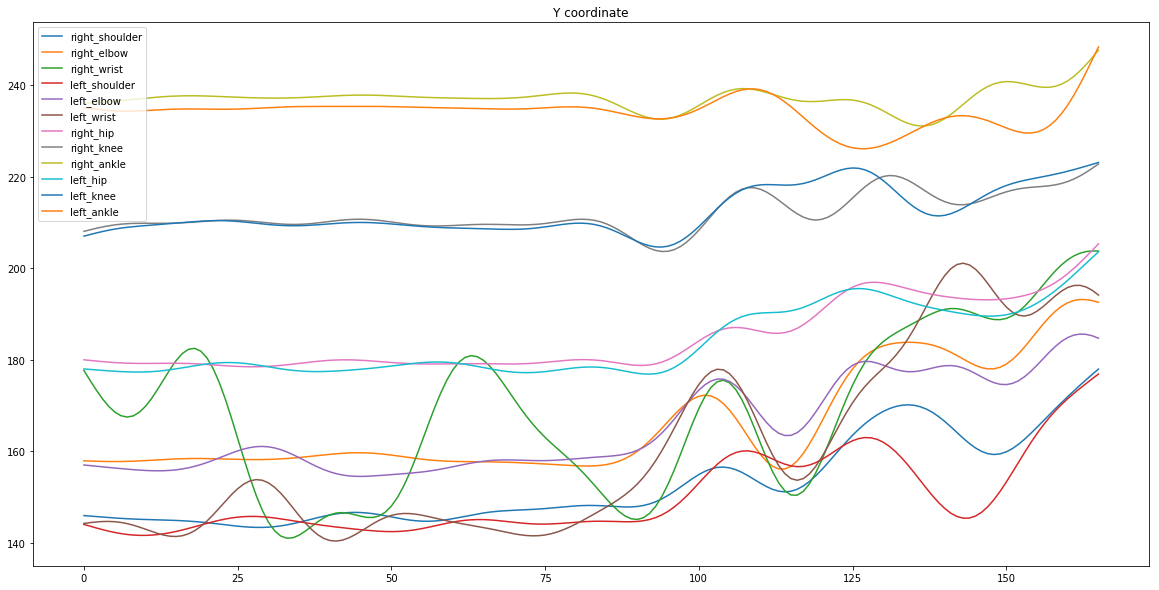

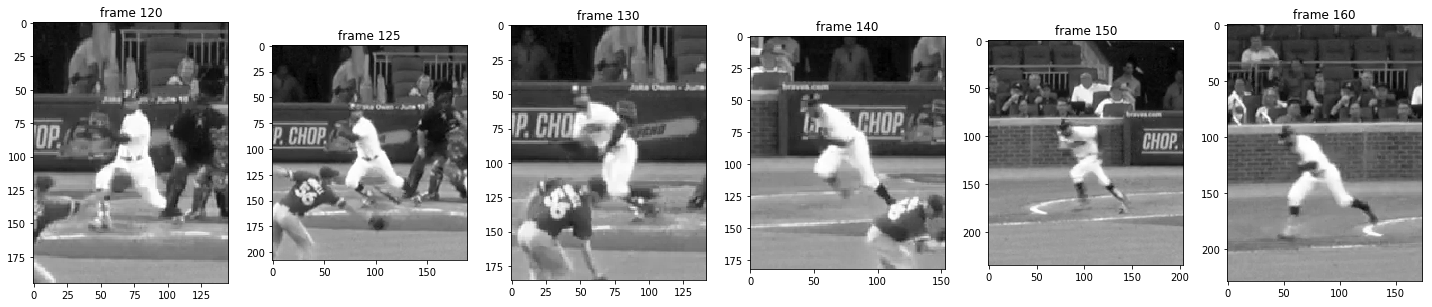

In [15]:
video_choice = 0 #files.index("60c8b309-e459-4a30-b05f-4f6cfaf4ad95")
#SMOOTHING
print("File:", files[video_choice])

plt.figure(figsize = (10,10))
for j in joints_list[:12]:
    plt.plot(joints_array_batter[video_choice][:,joints_list.index(j), 0], np.arange(0,len(joints_array_batter[video_choice]),1), label = j)
plt.title("X coordinate")
plt.ylim(167,0)
plt.ylabel("frame")
plt.legend()
plt.show()

# Plot video frames to visualize maxima in X coordinates
show_frames = [110, 115, 118, 120, 123, 126]
fig = plt.figure(figsize=(20, 5))
for ind, i in enumerate(show_frames):
    ax = fig.add_subplot(1,len(show_frames),ind+1)
    plt.imshow(videos_b[video_choice][i])
    plt.title("frame "+str(i))
    plt.gray()
plt.tight_layout()
plt.show()


plt.figure(figsize = (20,10))
for j in joints_list[:12]: #[one_joint]: 
    plt.plot(joints_array_batter[video_choice][:,joints_list.index(j), 1], label = j)
plt.legend()
#plt.ylim(140, 30)
plt.title("Y coordinate")
plt.show()

# Plot video frames to visualize maxima in Y coordinates
show_frames = [ 120, 125, 130, 140, 150, 160]
fig = plt.figure(figsize=(20, 5))
for ind, i in enumerate(show_frames):
    ax = fig.add_subplot(1,len(show_frames),ind+1)
    plt.imshow(videos_b[video_choice][i])
    plt.title("frame "+str(i))
plt.tight_layout()
plt.show()

## Import test functions to find first step, foot up and foot back to ground

In [16]:
from detect_event import first_move_batter_NN, first_move_gradient, foot_to_ground

# Parameter

relevant_joints = [7,8, 10,11]

## Visualize outputs

Number of videos 9

 
 
 

--------------NEW VIDEO ------------------
afa2b538-f2c4-4c29-8a66-bf6f4aeb8190
length data (166, 12, 2)
10 40
INFO:tensorflow:Restoring parameters from ../saved_models/batter_first_rnn_10_40
time for nr labels 0.31298017501831055
foot highest 94 foot down 101
--------------moment batter puts foot down 101 ------------------


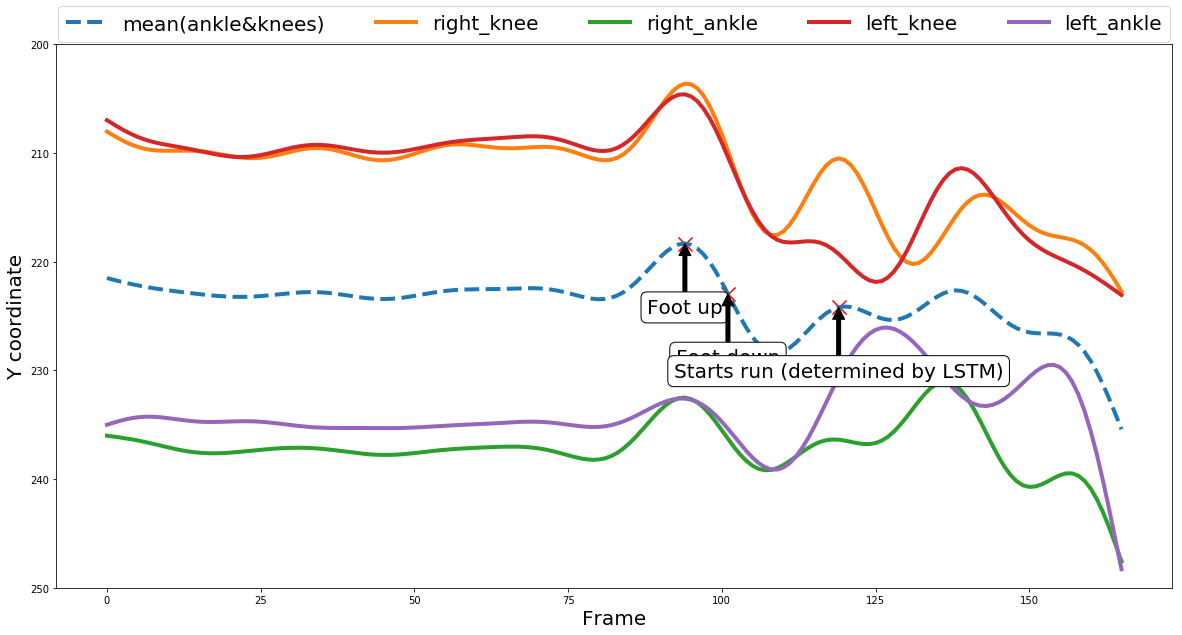

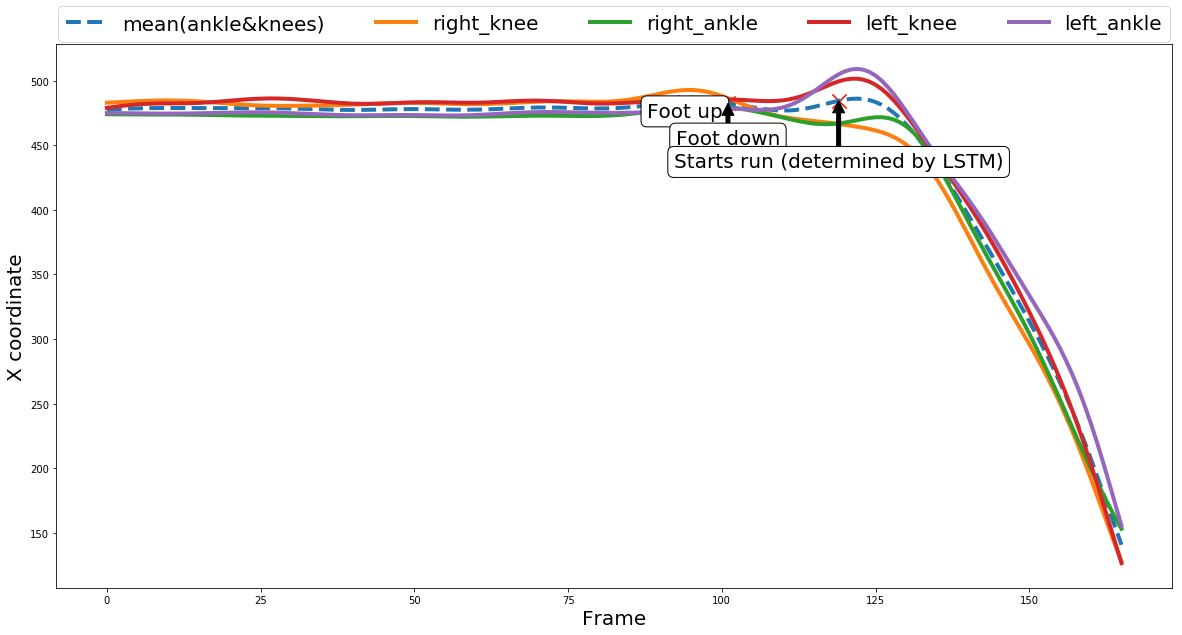

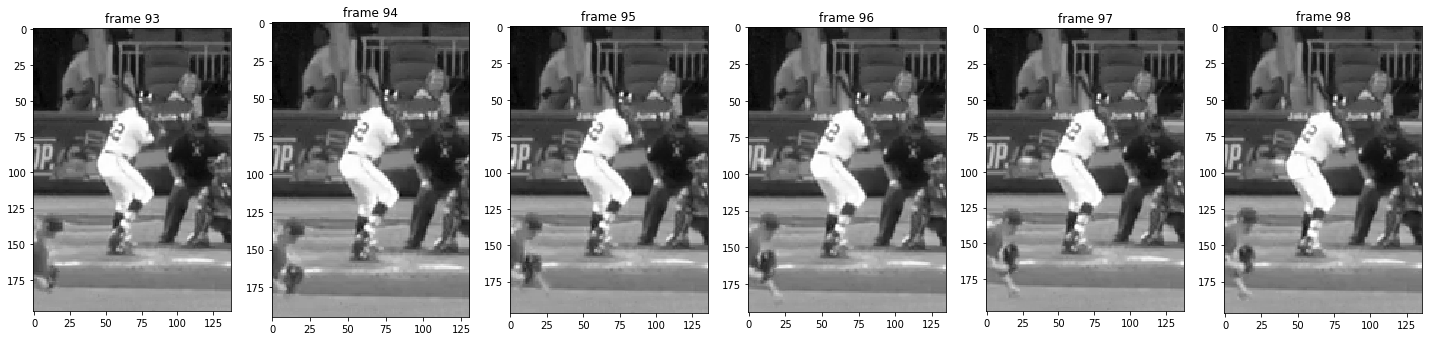


 
 
 

--------------NEW VIDEO ------------------
2356b918-0ada-4447-995f-7c693a830e75
length data (166, 12, 2)
10 40
INFO:tensorflow:Restoring parameters from ../saved_models/batter_first_rnn_10_40
time for nr labels 0.30840396881103516
foot highest 94 foot down 103
--------------moment batter puts foot down 103 ------------------


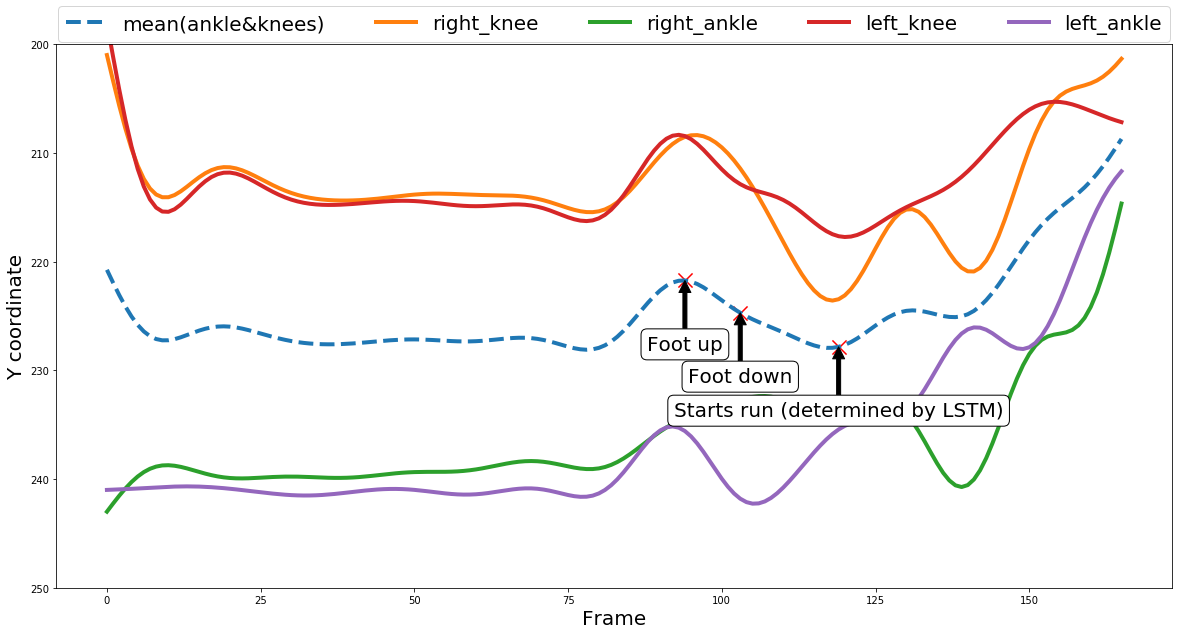

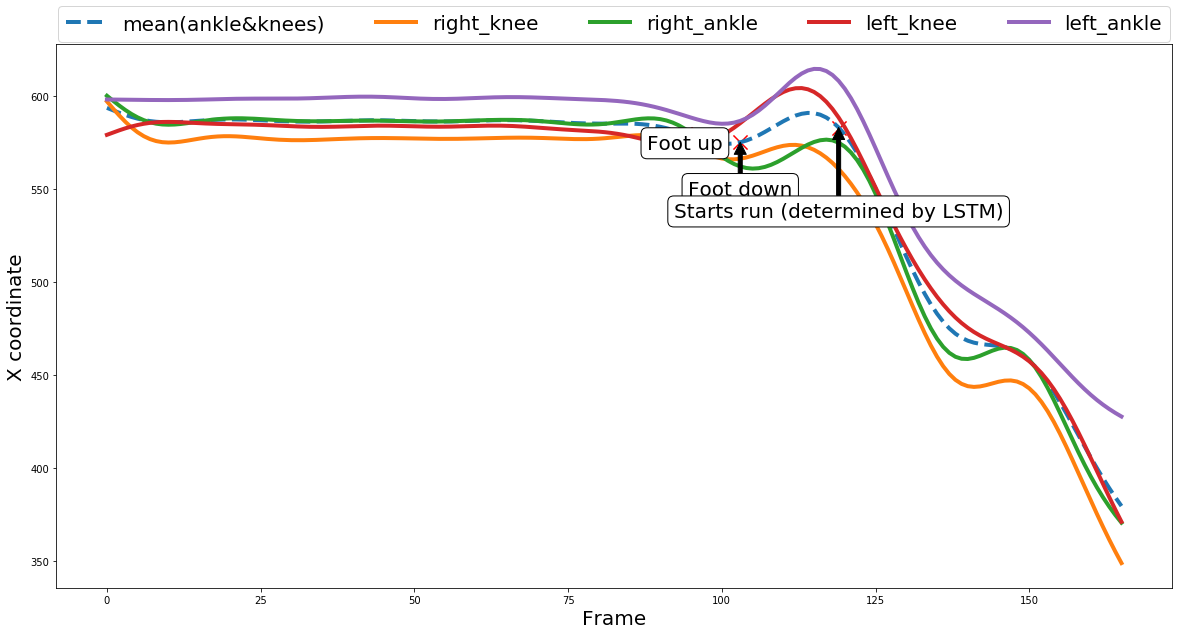

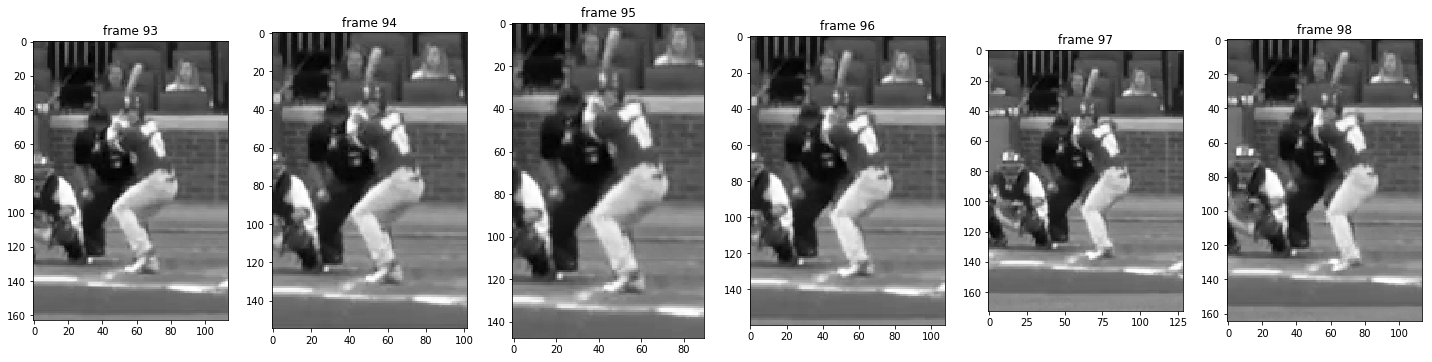


 
 
 

--------------NEW VIDEO ------------------
447c2a28-0191-4e1e-995f-595071ed13b8
length data (166, 12, 2)
10 40
INFO:tensorflow:Restoring parameters from ../saved_models/batter_first_rnn_10_40
time for nr labels 0.3076589107513428
foot highest 70 foot down 70
--------------moment batter puts foot down 70 ------------------


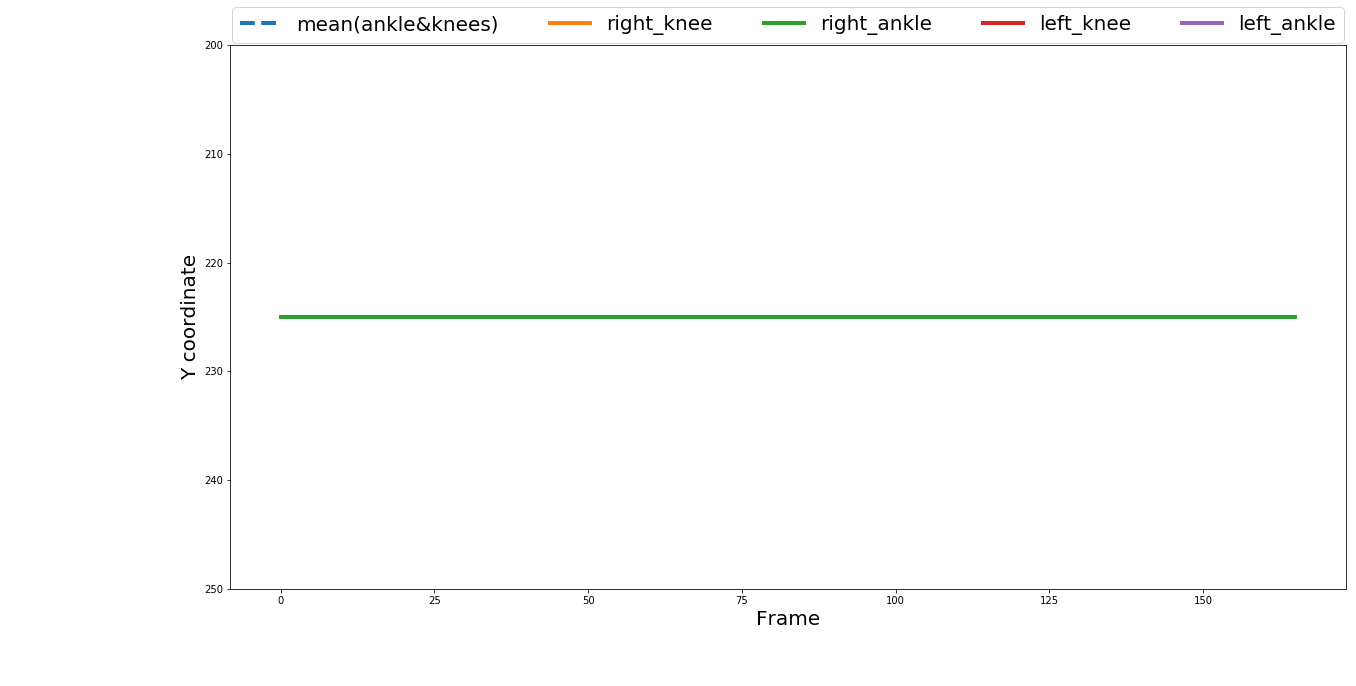

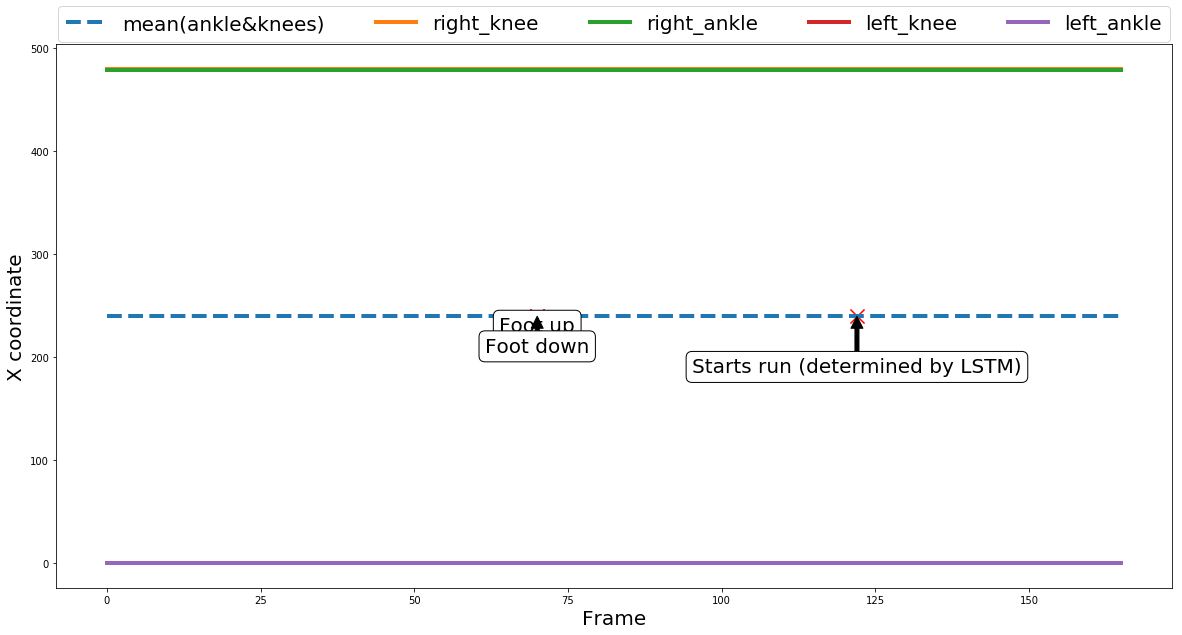

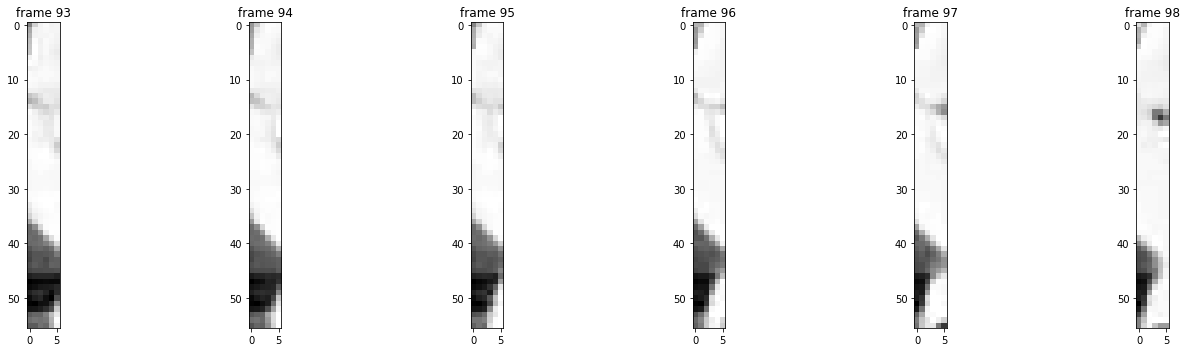


 
 
 

--------------NEW VIDEO ------------------
491f8d3a-3182-4bc8-8692-b5962fcf76bd
length data (166, 12, 2)
10 40
INFO:tensorflow:Restoring parameters from ../saved_models/batter_first_rnn_10_40
time for nr labels 0.32893896102905273
foot highest 92 foot down 100
--------------moment batter puts foot down 100 ------------------


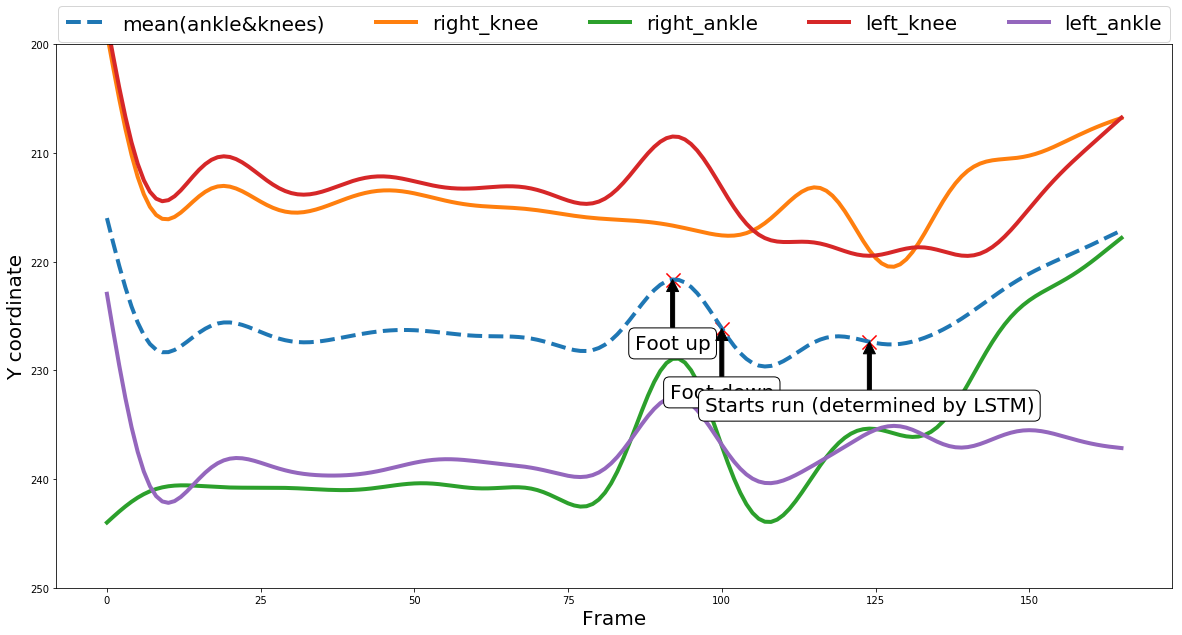

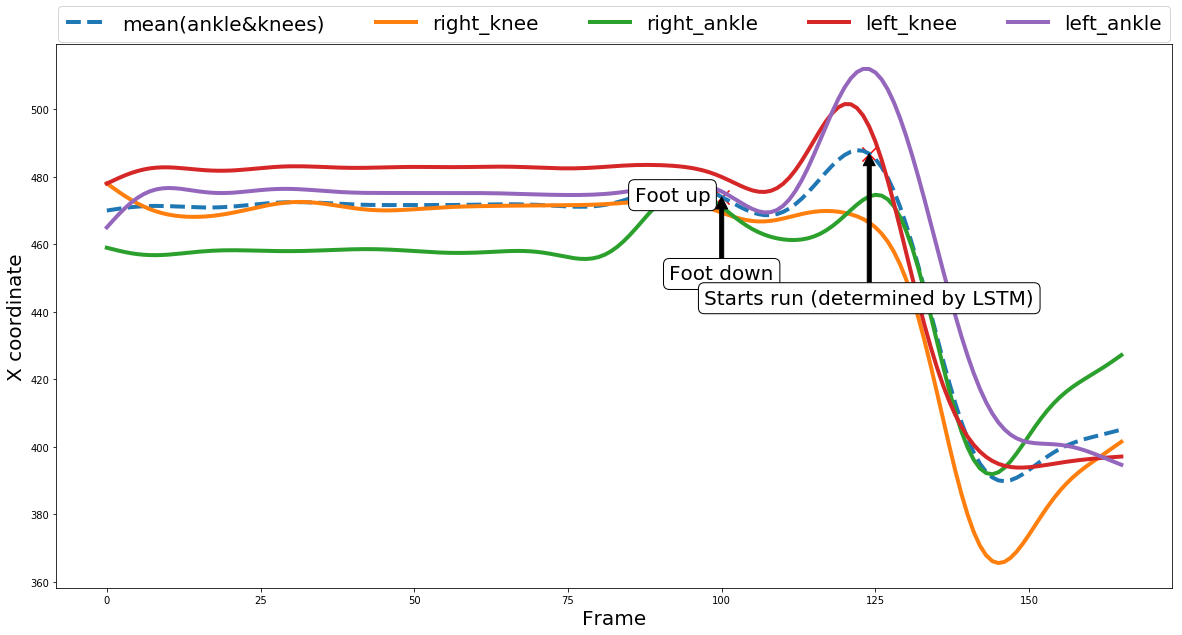

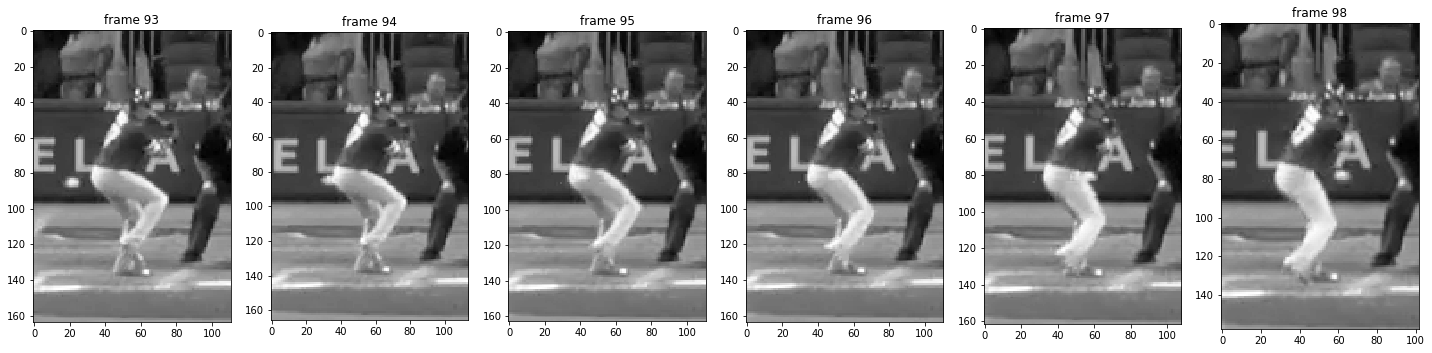


 
 
 

--------------NEW VIDEO ------------------
985b9fad-1314-419d-be37-ae44b50fb942
length data (166, 12, 2)
10 40
INFO:tensorflow:Restoring parameters from ../saved_models/batter_first_rnn_10_40
time for nr labels 0.30907106399536133
foot highest 70 foot down 70
--------------moment batter puts foot down 70 ------------------


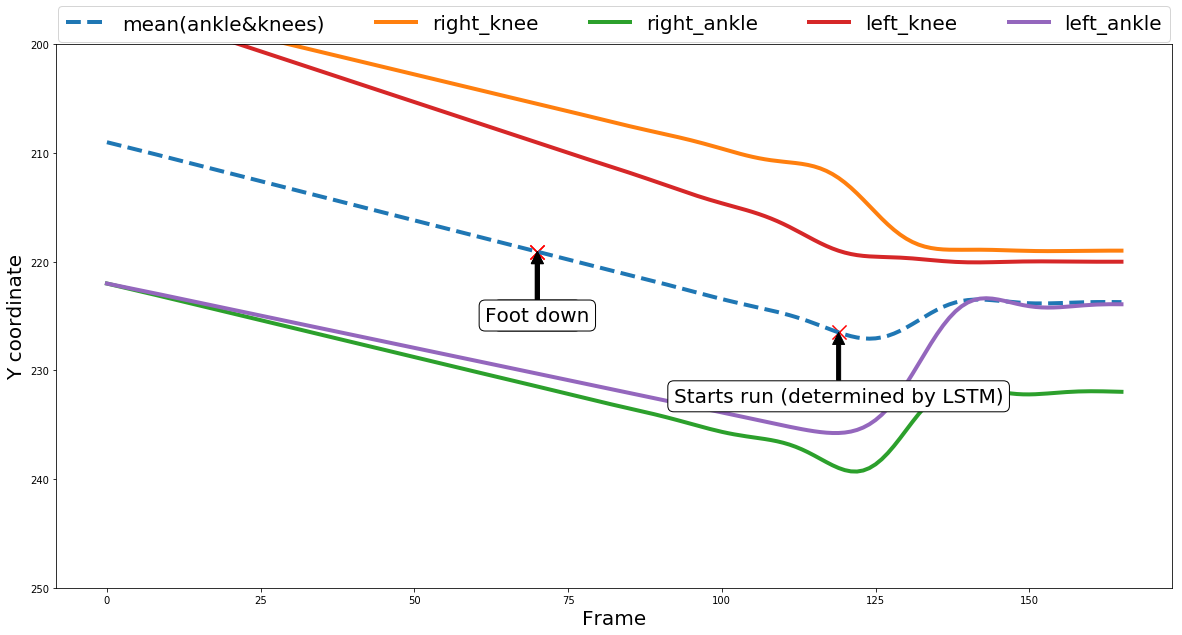

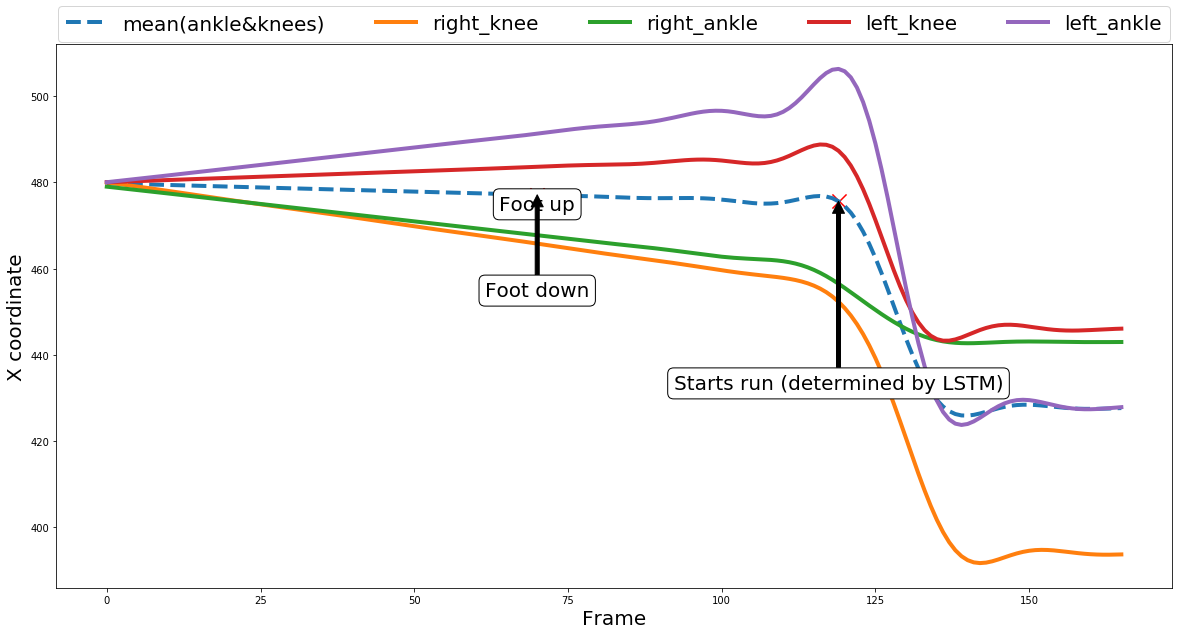

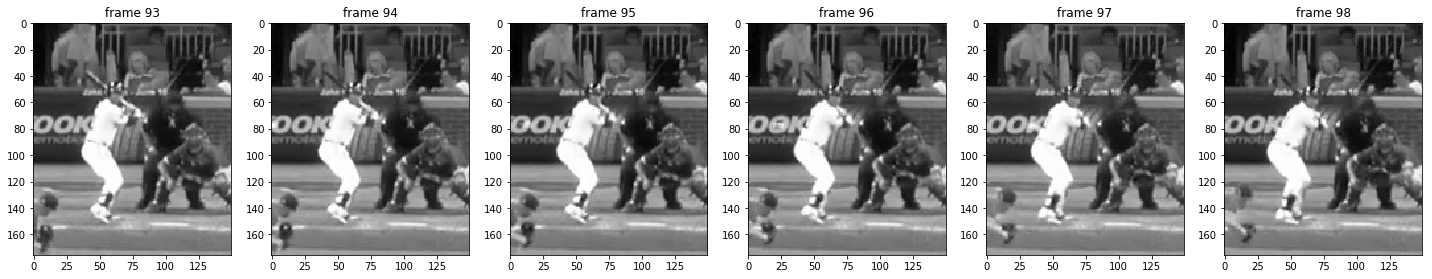


 
 
 

--------------NEW VIDEO ------------------
1eb8a6e1-e498-40fd-bb93-c308f2972b26
length data (166, 12, 2)
10 40
INFO:tensorflow:Restoring parameters from ../saved_models/batter_first_rnn_10_40
time for nr labels 0.3141927719116211
foot highest 97 foot down 106
--------------moment batter puts foot down 106 ------------------


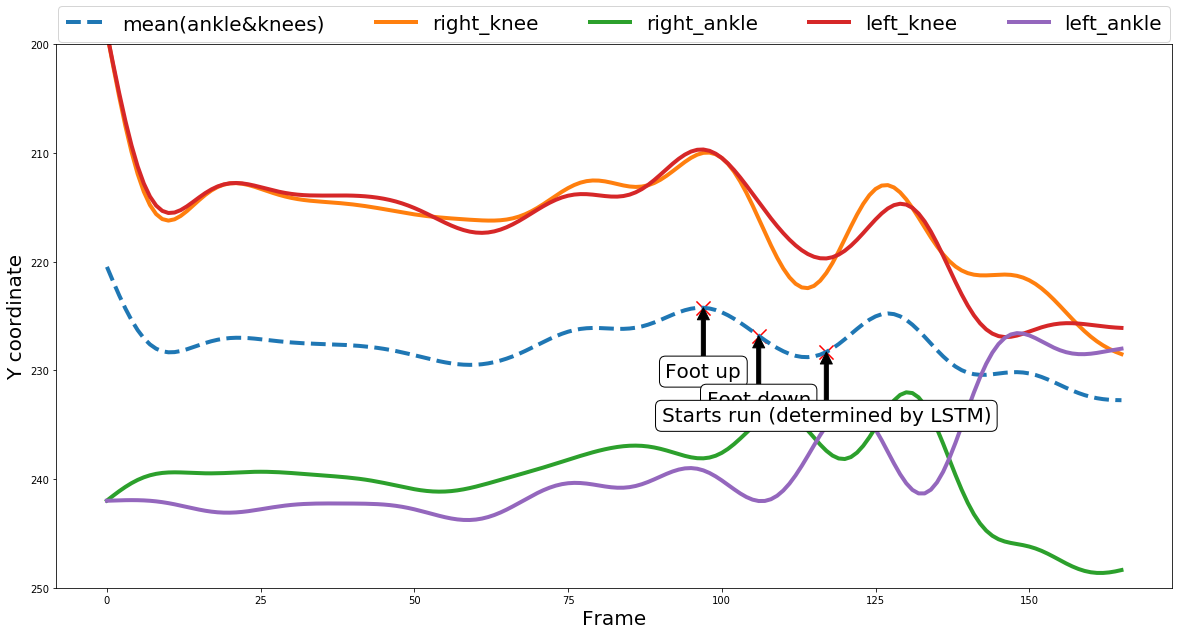

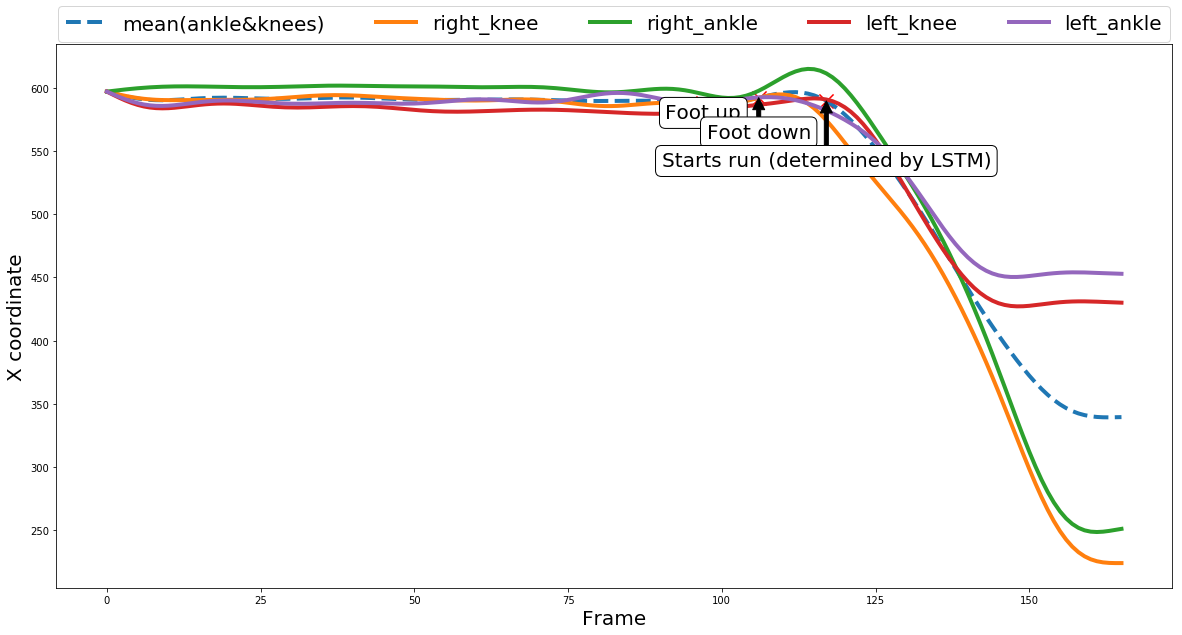

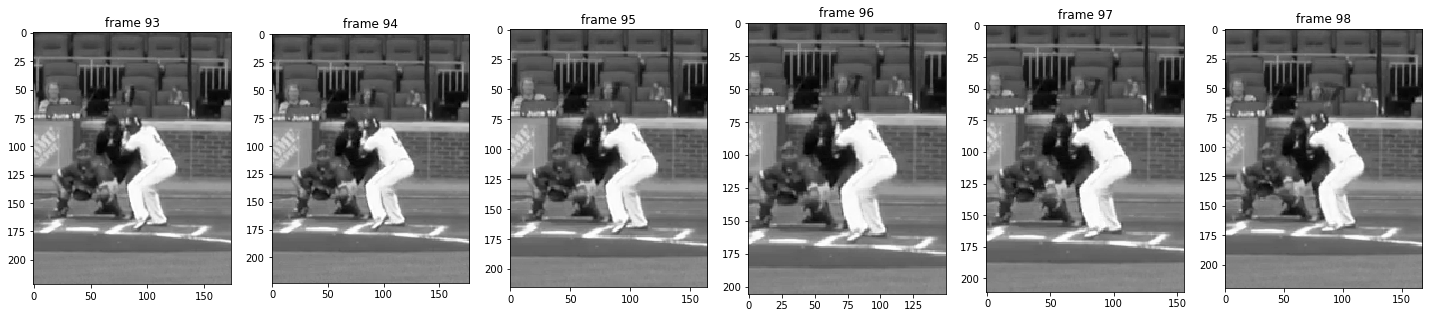


 
 
 

--------------NEW VIDEO ------------------
187506da-d7d9-40e9-8e91-a09575a9a150
length data (166, 12, 2)
10 40
INFO:tensorflow:Restoring parameters from ../saved_models/batter_first_rnn_10_40
time for nr labels 0.3044459819793701
foot highest 107 foot down 107
--------------moment batter puts foot down 107 ------------------


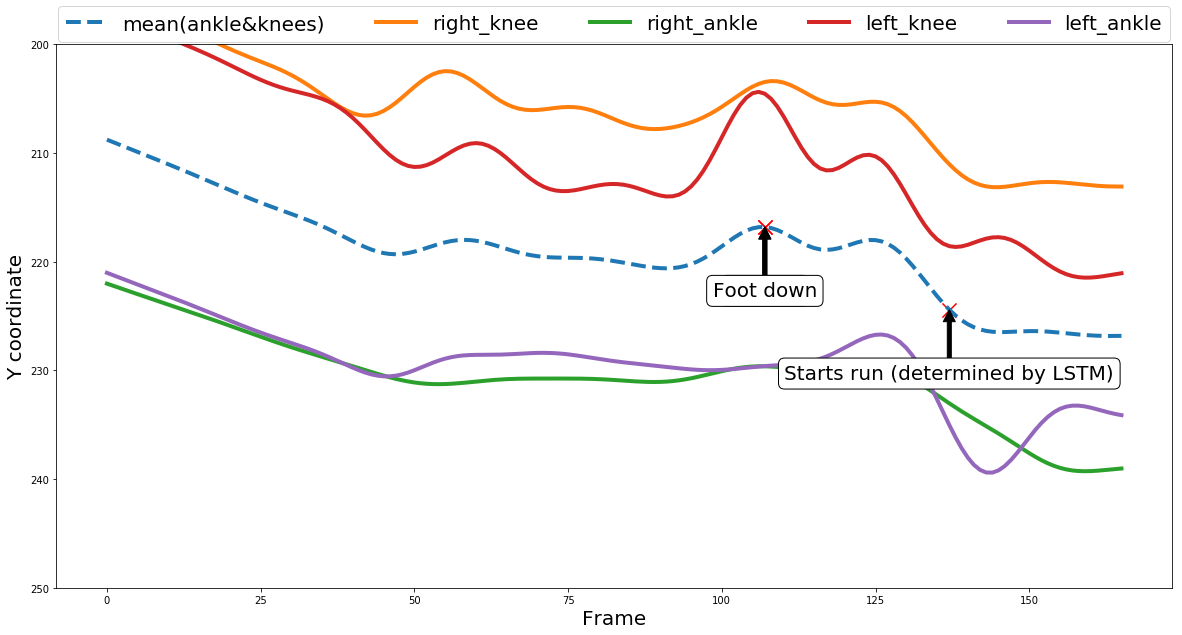

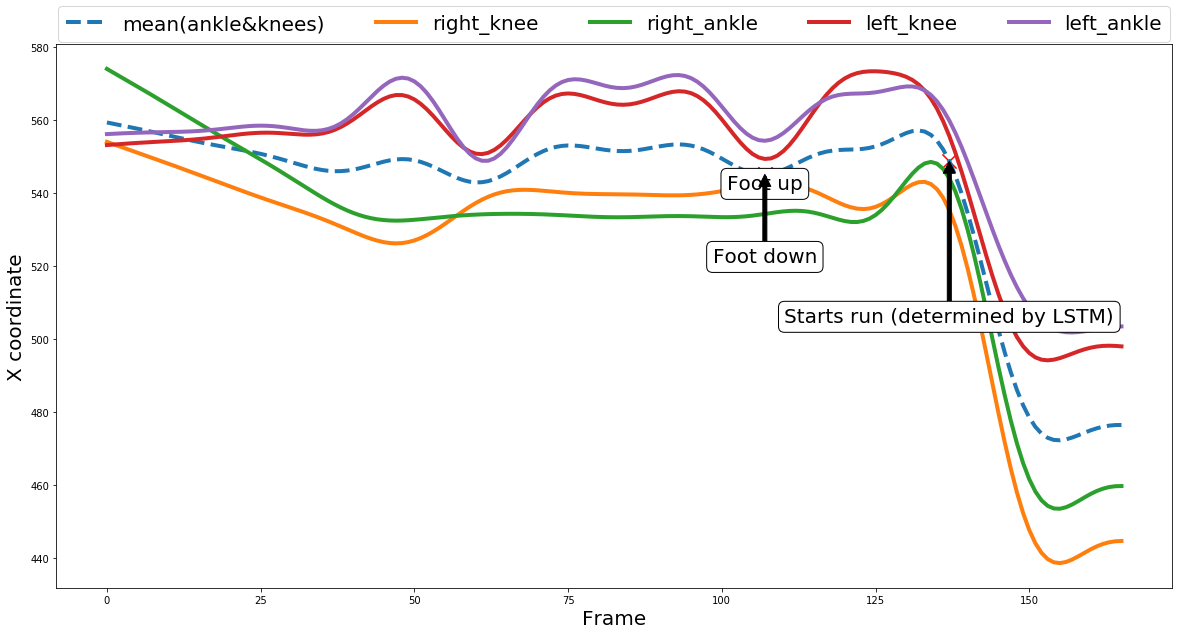

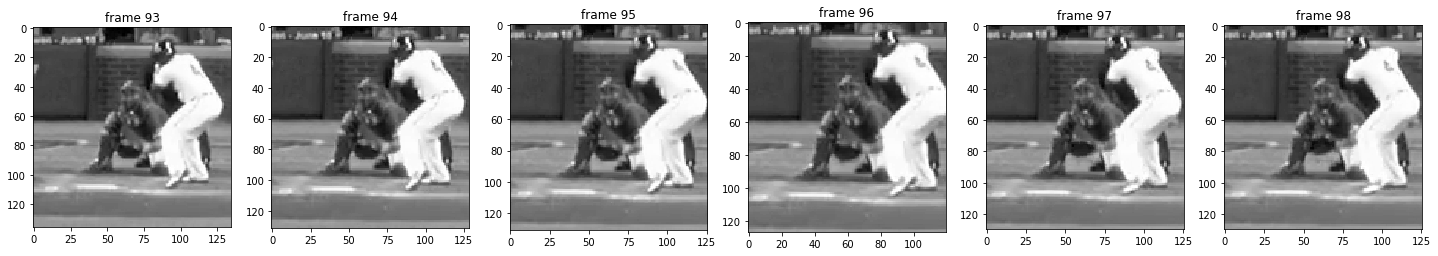


 
 
 

--------------NEW VIDEO ------------------
60c8b309-e459-4a30-b05f-4f6cfaf4ad95
length data (163, 12, 2)
10 40
INFO:tensorflow:Restoring parameters from ../saved_models/batter_first_rnn_10_40
time for nr labels 0.4047970771789551
foot highest 98 foot down 107
--------------moment batter puts foot down 107 ------------------


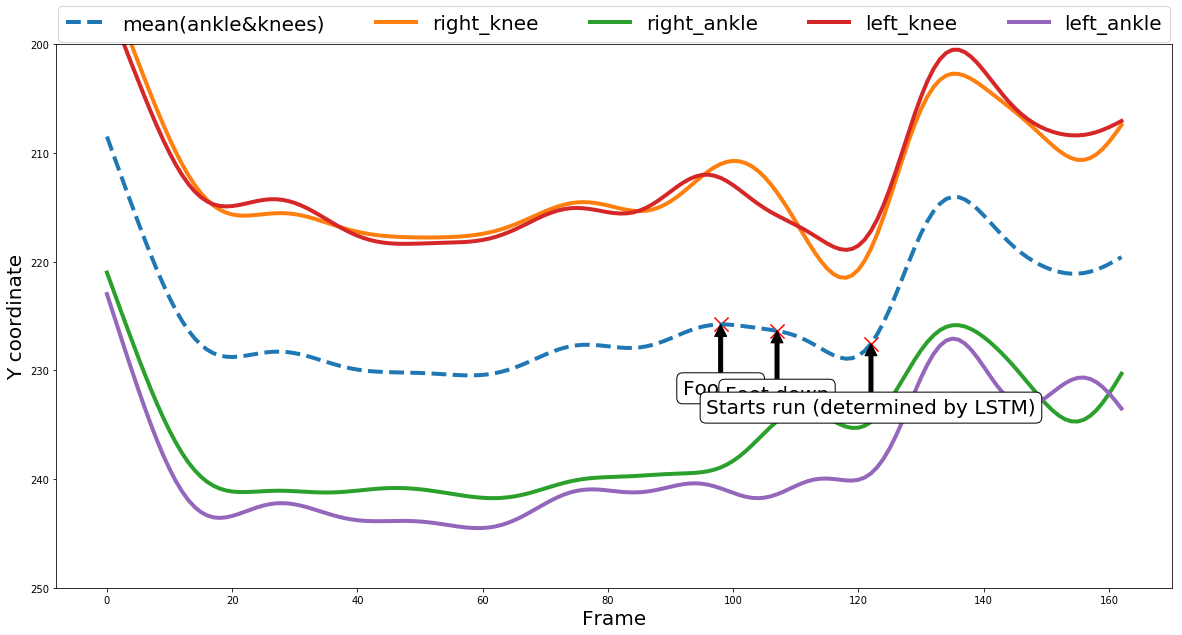

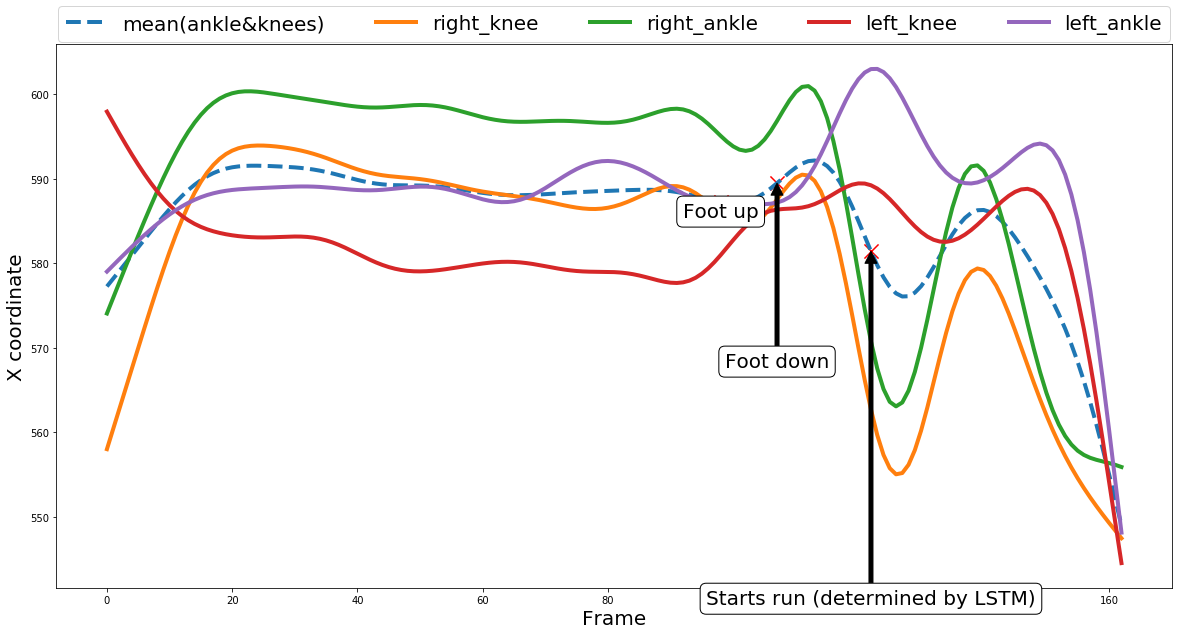

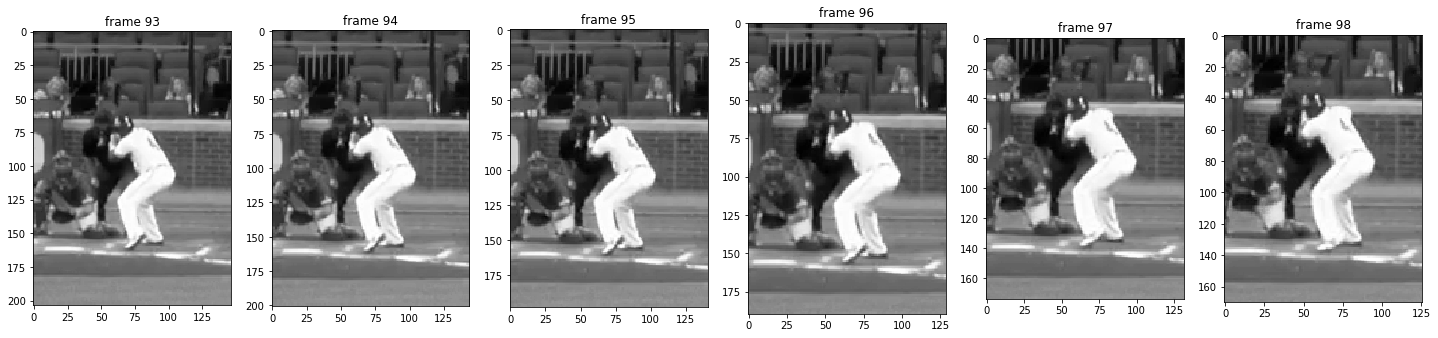


 
 
 

--------------NEW VIDEO ------------------
a6f5f2ce-3935-4b02-b4f7-304e99303af4
length data (161, 12, 2)
10 40
INFO:tensorflow:Restoring parameters from ../saved_models/batter_first_rnn_10_40
time for nr labels 0.30260491371154785
foot highest 111 foot down 111
--------------moment batter puts foot down 111 ------------------


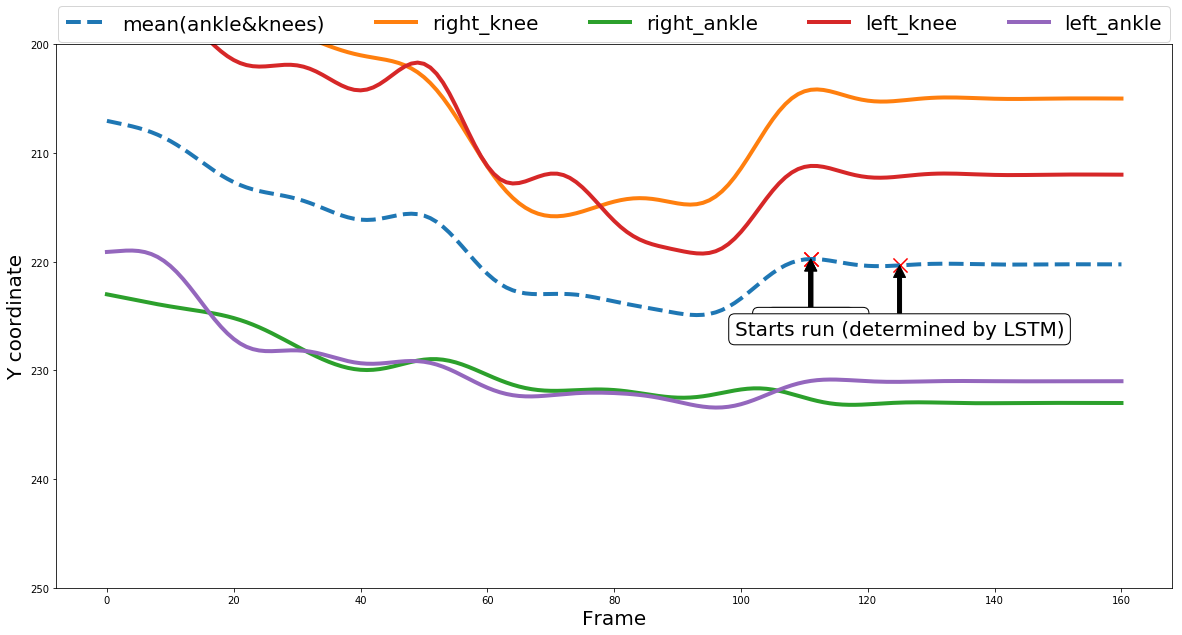

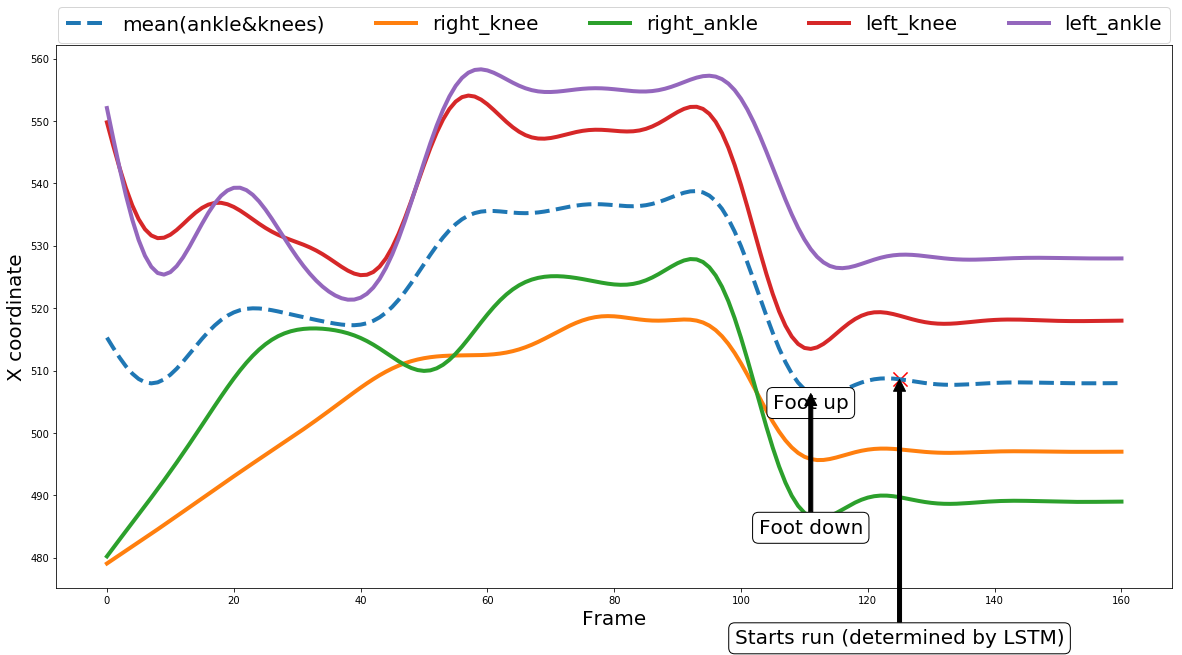

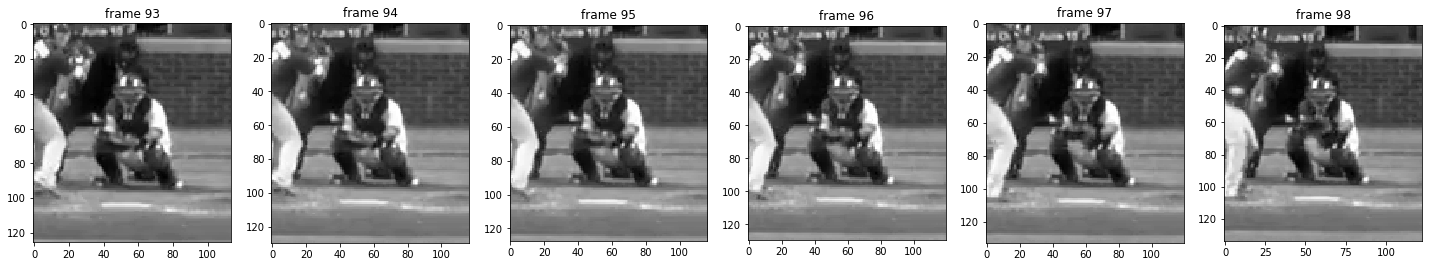

In [18]:
  
#with open("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/train_data/labels_first_batter_test", "r") as infile:
 #   labels_test = json.load(infile)
print("Number of videos", len(joints_array_batter))
for video_choice in range(len(joints_array_batter)):
    #if hit_into[video_choice]=="no" or "Foul" in play_outcome[video_choice] or files[video_choice] in wrong_guy or "Field out" in play_outcome[video_choice]:
     #   print(play_outcome[video_choice], files[video_choice])
        #  continue
    print("\n \n \n \n")
    print("--------------NEW VIDEO ------------------")
    print(files[video_choice])
    # print(play_outcome[video_choice])
    batter = joints_array_batter[video_choice]
    print("length data", batter.shape)
    
    first_move = first_move_batter_NN(np.array([batter]), [90], model = os.path.join("..", "saved_models","batter_first_rnn_10_40"))[0]# int(labels_test[files[video_choice]])
    
    foot_up, foot_down = foot_to_ground(batter, release = 90, start_run = first_move)
    
    if foot_up is None:
        continue
    # relevant_joints = [[7,10],[8,11]]
    
    print("foot highest", foot_up, "foot down", foot_down)
    result_list =  [foot_up, foot_down, first_move]  
    print("--------------moment batter puts foot down", foot_down, "------------------")
    plt.figure(figsize = (20,10))
    mean_traj = np.mean(batter[:, relevant_joints, 1], axis=1)
    plt.plot(mean_traj, linestyle="--", label="mean(ankle&knees)", linewidth=4.0)
    for j in relevant_joints:
        plt.plot(batter[:,j, 1], label = joints_list[j], linewidth=4.0)
    plt.scatter(result_list, mean_traj[result_list],s=200, marker='x', color = "red")
    n = ["Foot up", "Foot down", "Starts run (determined by LSTM)"]
    for i, txt in enumerate(n):
        if i==2:
            shift = 0
        else:
            shift = 0
        plt.annotate(txt, (result_list[i], mean_traj[result_list[i]]),  xytext= tuple(np.array([result_list[i]-shift, mean_traj[result_list[i]]+5])) , fontsize=20, bbox = dict(boxstyle="round", fc="white"), arrowprops=dict(facecolor='black'), horizontalalignment='center', verticalalignment="top")
    plt.legend(bbox_to_anchor=(0., 1.0, 1., 1.0), loc=3, ncol=7, mode="expand", borderaxespad=0.1, fontsize=20)
    # plt.title("Y gradient")
    plt.xlabel("Frame", fontsize=20)
    plt.ylabel("Y coordinate", fontsize=20)
    plt.ylim(250,200)
    plt.show()
    
    
    plt.figure(figsize = (20,10))
    mean_traj = np.mean(batter[:, relevant_joints, 0], axis=1)
    plt.plot(mean_traj, linestyle="--", label="mean(ankle&knees)", linewidth=4.0)
    for j in relevant_joints:
        plt.plot(batter[:,j, 0], label = joints_list[j], linewidth=4.0)
    plt.scatter(result_list, mean_traj[result_list],s=200, marker='x', color = "red")
    n = ["Foot up", "Foot down", "Starts run (determined by LSTM)"]
    for i, txt in enumerate(n):
        if i==2:
            shift = 0
        else:
            shift = 0
        plt.annotate(txt, (result_list[i], mean_traj[result_list[i]]),  xytext= tuple(np.array([result_list[i]-shift, mean_traj[result_list[i]]-20*i])) , fontsize=20, bbox = dict(boxstyle="round", fc="white"), arrowprops=dict(facecolor='black'), horizontalalignment='center', verticalalignment="top")
    plt.legend(bbox_to_anchor=(0., 1.0, 1., 1.0), loc=3, ncol=7, mode="expand", borderaxespad=0.1, fontsize=20)
    # plt.title("Y gradient")
    plt.xlabel("Frame", fontsize=20)
    plt.ylabel("X coordinate", fontsize=20)
    plt.show()
    
     
    show_frames = range(foot_down_gradient-3, foot_down_gradient+3)
    fig = plt.figure(figsize=(20, 5))
    for ind, i in enumerate(show_frames):
        ax = fig.add_subplot(1,len(show_frames),ind+1)
        plt.imshow(videos_b[video_choice][i])
        plt.gray()
        plt.title("frame "+str(i))
    plt.tight_layout()
    plt.show()